<a href="https://colab.research.google.com/github/Arjun-A-Pathak/Cardiovascular-risk-prediction-10-year-future-risk-of-CHD-/blob/main/ARJUN_PATHAK_Capstone_Project_03_(Cardiovascular_Risk_Predi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import imblearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, neighbors, tree, ensemble
from sklearn import svm
import warnings  
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv")
print("Shape of the dataframe is",df.shape)
df.head()

Shape of the dataframe is (3390, 17)


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
#### here after encoding in sex column 0 represents the female and 1 represents the male
#### here after encoding in is_smoking column 0 represents the No and 1 represents the Yes

from sklearn.preprocessing import LabelEncoder
label =LabelEncoder() 

df['sex']= label.fit_transform(df['sex']) 
df['is_smoking']= label.fit_transform(df['is_smoking']) 
print(df['sex'].unique())
print(df['is_smoking'].unique())


[0 1]
[1 0]


In [8]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [9]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
df["glucose"].fillna(df["glucose"].mean(),inplace=True )
df = df.dropna().reset_index(drop=True)

In [11]:
df['BPMeds'] = df['BPMeds'].astype(int)
df['education'] = df['education'].astype(int)

In [12]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,36,4,1,0,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,2,46,1,0,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,3,50,1,1,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,4,64,1,0,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,5,61,3,0,0,0.0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [13]:
df = df.drop(["id"],axis=1)

In [14]:
df.describe()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,49.423957,1.972719,0.436814,0.495140,9.098150,0.029476,0.005958,0.313264,0.025400,236.968642,132.436344,82.841173,25.774569,76.034180,81.946901,0.148950
std,8.556235,1.018435,0.496069,0.500055,11.864621,0.169164,0.076970,0.463894,0.157361,44.537998,22.176848,11.993650,4.132848,12.056788,23.095154,0.356095
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.940000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.370000,75.000000,79.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,27.990000,83.000000,85.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3189 non-null   int64  
 1   education        3189 non-null   int64  
 2   sex              3189 non-null   int64  
 3   is_smoking       3189 non-null   int64  
 4   cigsPerDay       3189 non-null   float64
 5   BPMeds           3189 non-null   int64  
 6   prevalentStroke  3189 non-null   int64  
 7   prevalentHyp     3189 non-null   int64  
 8   diabetes         3189 non-null   int64  
 9   totChol          3189 non-null   float64
 10  sysBP            3189 non-null   float64
 11  diaBP            3189 non-null   float64
 12  BMI              3189 non-null   float64
 13  heartRate        3189 non-null   float64
 14  glucose          3189 non-null   float64
 15  TenYearCHD       3189 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 398.8 KB


# DATA VISUALISATION

* ### <span style="color:blue"> COUNT PLOT FOR OUTPUT PARAMETER ("TenYearCHD ") </span>

Text(0, 0.5, 'TenYearCHD')

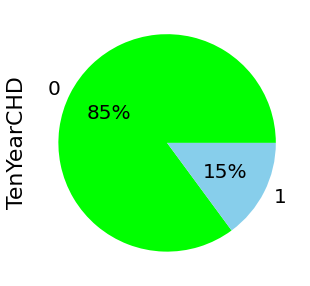

In [16]:
def label_function(val):
    return f'{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

df.groupby('TenYearCHD').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['lime', 'skyblue'],ax=ax1)

ax1.set_ylabel('TenYearCHD', size=22)



* From this plot we can see that dataset is imbalanced. As we can see that most of data is having value 0 so our model will predict most occuring value and accuracy will increases. 

* ### <span style="color:blue"> BOX PLOT FOR ALL INPUT PARAMETER FOR CHECKING OUTLIERS </span>

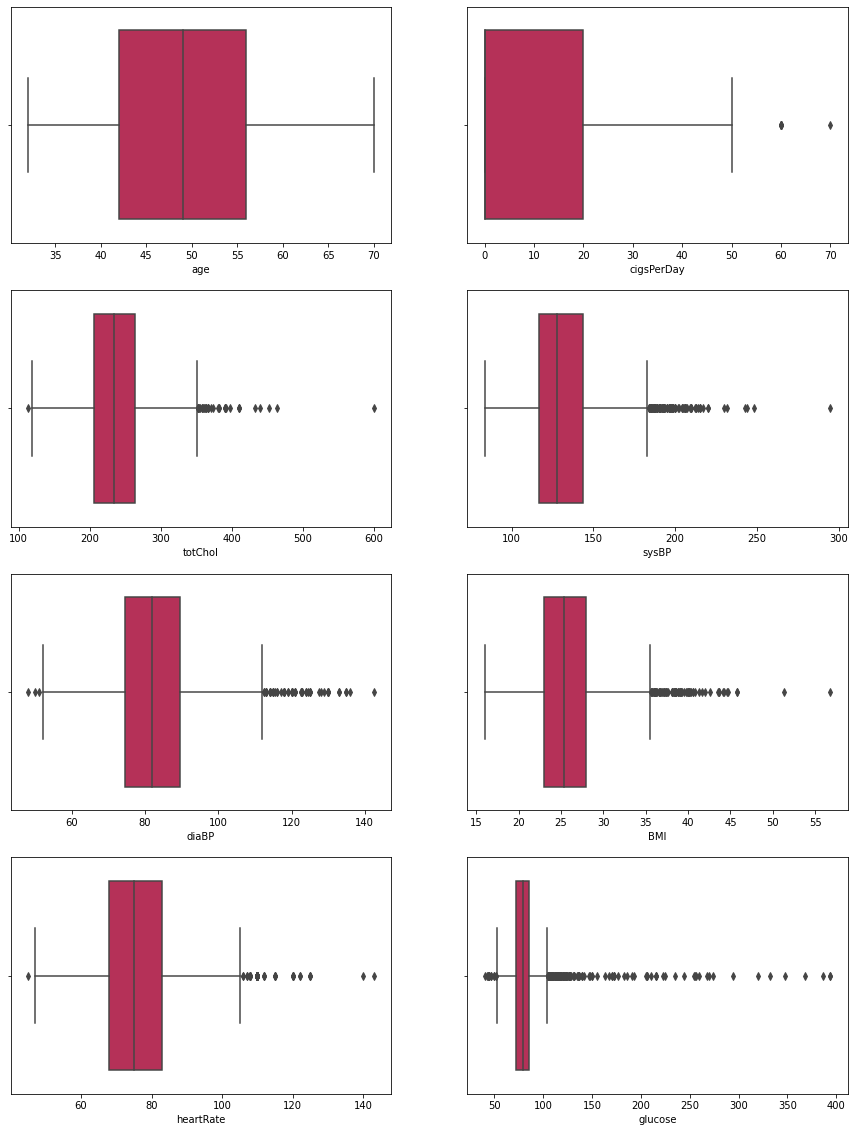

In [17]:
li = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

count=1
plt.subplots(figsize=(15, 20))
for i in li:
    ax=plt.subplot(4,2,count)
    sns.boxplot(x=df[i],ax=ax,palette="rocket")

    count+=1
    

plt.show()
    



* <span> From above boxplots we can see that there are outliers in every column except age. </span>

* ### <span style="color:blue"> REMOVING OUTLIERS </span>

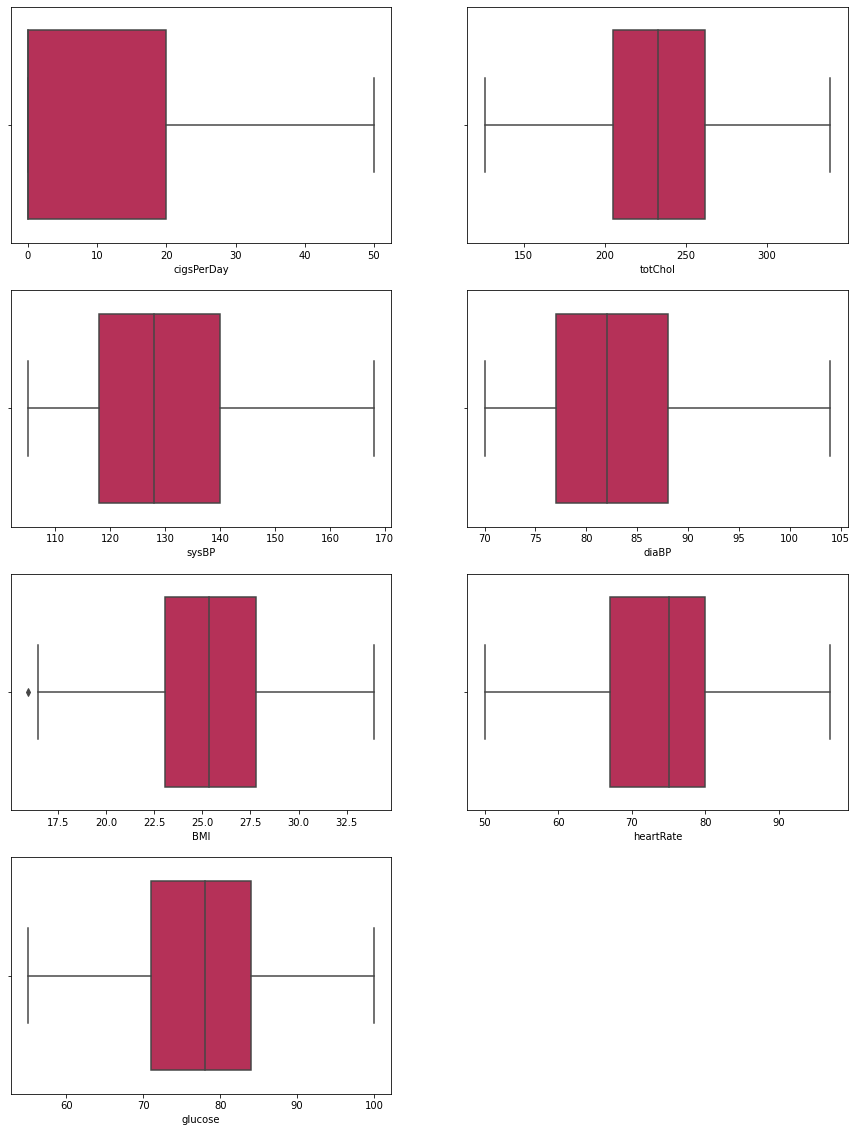

In [18]:
plt.subplots(figsize=(15, 20))

a = np.where(df["cigsPerDay"]>50)
df.drop(a[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,1)
sns.boxplot(x=df["cigsPerDay"],ax=ax,palette="rocket")


a,b = np.where(df["totChol"]>=340),np.where(df["totChol"]<=125)
df.drop(a[0], inplace = True)
df.drop(b[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,2)
sns.boxplot(x=df["totChol"],ax=ax,palette="rocket")


a = np.where(df["sysBP"]>168)
b = np.where(df["sysBP"]< 105)
df.drop(a[0], inplace = True)
df.drop(b[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,3)
sns.boxplot(x=df["sysBP"],ax=ax,palette="rocket")


a = np.where(df["diaBP"]>104)
b = np.where(df["diaBP"]< 70)
df.drop(a[0], inplace = True)
df.drop(b[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,4)
sns.boxplot(x=df["diaBP"],ax=ax,palette="rocket")


a = np.where(df["BMI"]>34)
df.drop(a[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,5)
sns.boxplot(x=df["BMI"],ax=ax,palette="rocket")


a,b = np.where(df["heartRate"]>97),np.where(df["heartRate"]<50)
df.drop(a[0], inplace = True)
df.drop(b[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,6)
sns.boxplot(x=df["heartRate"],ax=ax,palette="rocket")


a,b = np.where(df["glucose"]>100),np.where(df["glucose"]<55)
df.drop(a[0], inplace = True)
df.drop(b[0], inplace = True)
df = df.reset_index(drop=True)
ax=plt.subplot(4,2,7)
sns.boxplot(x=df["glucose"],ax=ax,palette="rocket")




* Now there is no outliers in each columns.

In [19]:
print("SHAPE OF THE DATA FRAME IS",df.shape)

SHAPE OF THE DATA FRAME IS (2086, 16)


* ### <span style="color:blue"> DIVIDE THIS DATA SET INTO CATEGORICAL AND CONTINOUS DATA SET </span>

In [20]:
df_cat = df.drop(['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose'],axis=1)
df_cont = df[['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']]

In [21]:
cat_col = df_cat.columns
cont_col = df_cont.columns


* ### <span style="color:blue">DATA VISUALISATION OF CATEGORICAL DATA SET </span>

In [22]:
col = ['BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes',]

for i in col:
    a = df_cat.groupby(['sex','is_smoking',i,'TenYearCHD']).size()
    print(a)
    print('-------------------------------------------------------------')

sex  is_smoking  BPMeds  TenYearCHD
0    0           0       0             601
                         1              62
                 1       0              16
                         1               6
     1           0       0             370
                         1              44
                 1       0               5
                         1               1
1    0           0       0             318
                         1              52
                 1       0               3
                         1               2
     1           0       0             502
                         1             101
                 1       0               3
dtype: int64
-------------------------------------------------------------
sex  is_smoking  prevalentStroke  TenYearCHD
0    0           0                0             614
                                  1              67
                 1                0               3
                                  1        

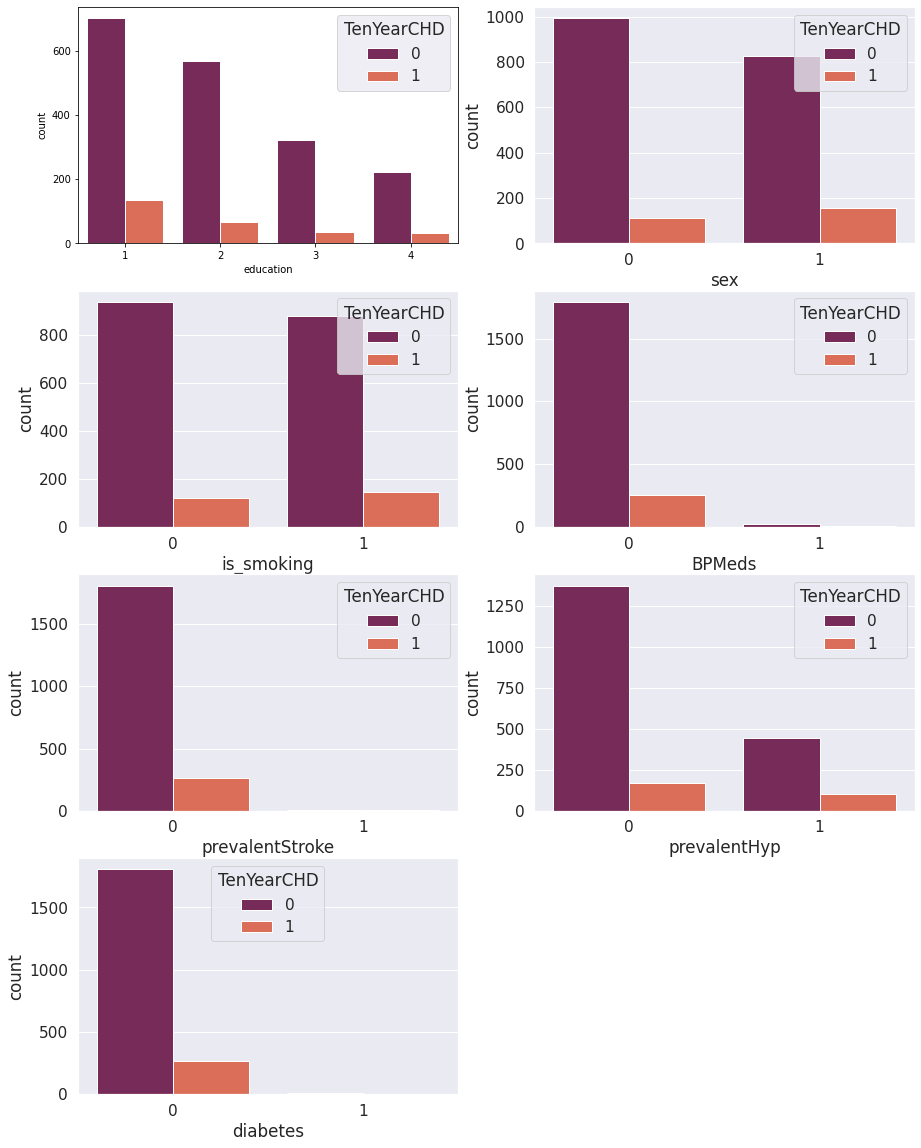

In [23]:
count=1
plt.subplots(figsize=(15, 20))
for i in cat_col[:-1]:
    ax=plt.subplot(4,2,count)
    sns.set(font_scale=1.4)
    sns.countplot(x=df_cat[i],hue=df_cat["TenYearCHD"],palette='rocket')
    count+=1
plt.show()

In [24]:
def corr_matrix(dataset,title): 
    f,ax = plt.subplots(figsize=(15,10))
    corr=dataset.corr()    
    sns.heatmap(corr, cmap='rocket', annot=True, annot_kws={'size':12}, ax=ax)
    ax.set_title(title, fontsize=20)
    plt.show()

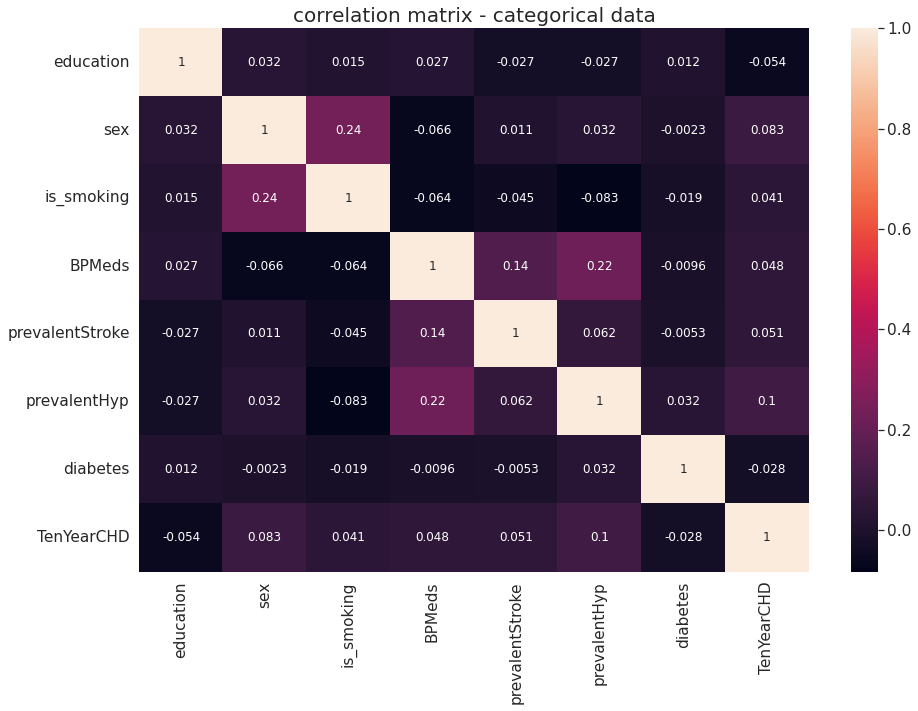

In [25]:
corr_matrix(df_cat,"correlation matrix - categorical data")

* ### <span style="color:blue">DATA VISUALISATION OF CONTINOUS DATA SET </span>

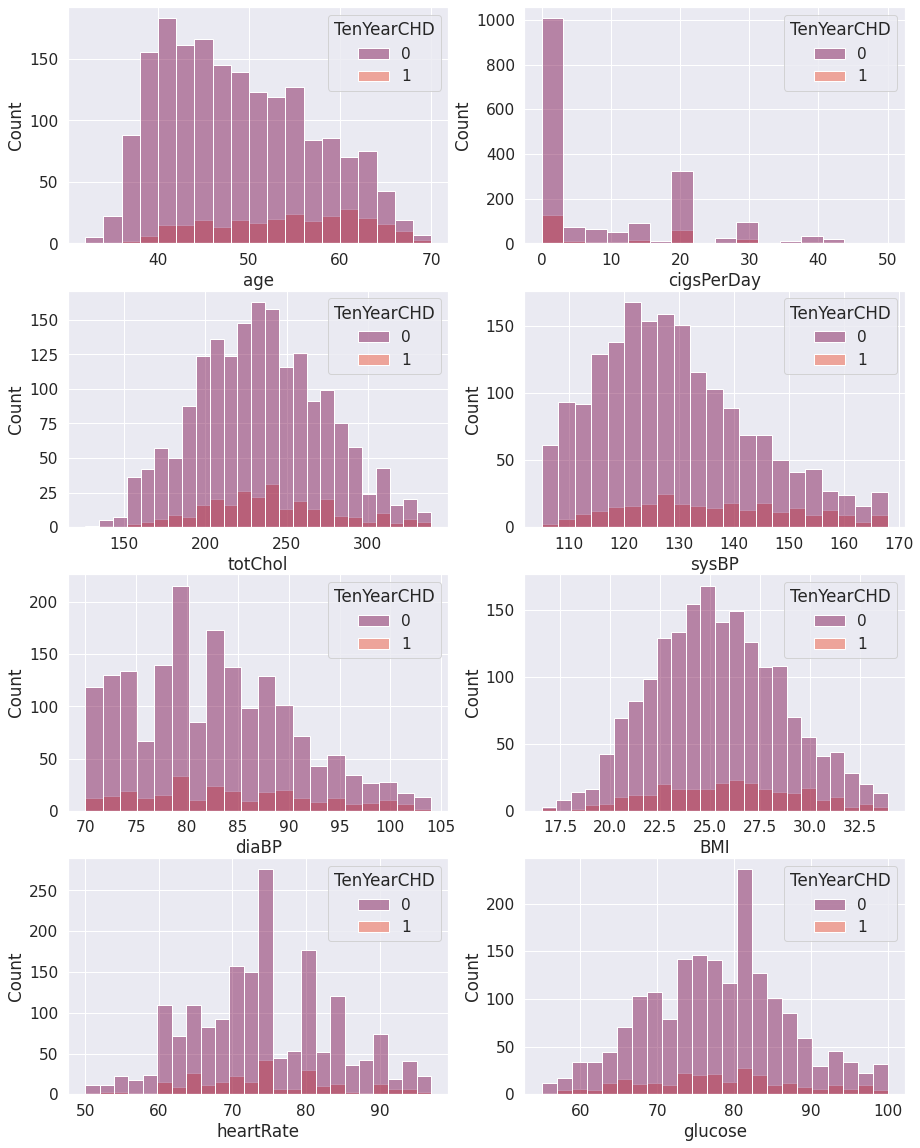

In [26]:
count=1
plt.subplots(figsize=(15, 20))

for i in cont_col[:-1]:
    ax=plt.subplot(4,2,count)
    sns.set(font_scale=1.4)
    sns.histplot(x=i, hue='TenYearCHD',data=df_cont,palette='rocket')
    count+=1
plt.show()

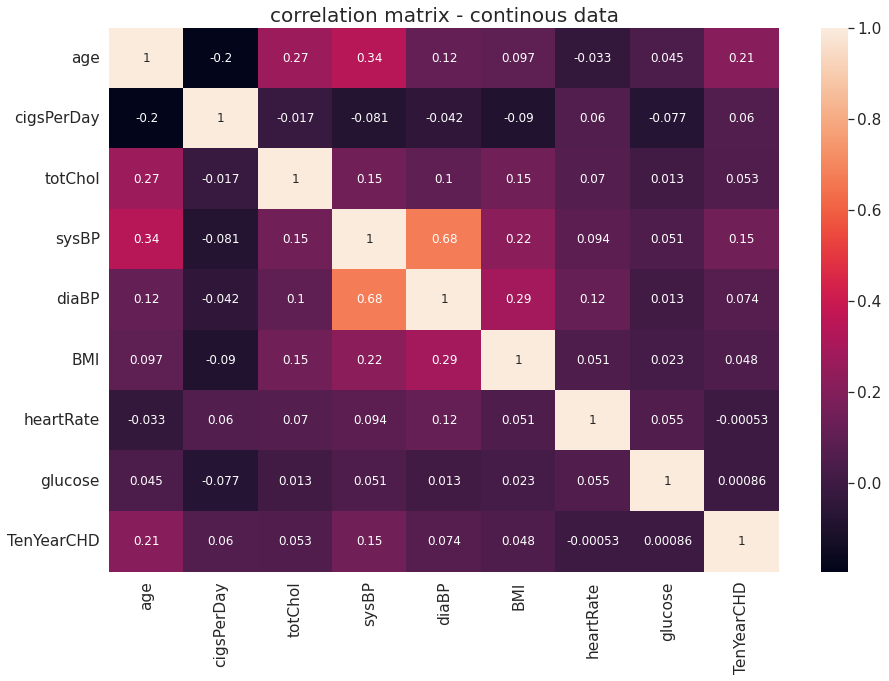

In [27]:
corr_matrix(df_cont,"correlation matrix - continous data")

<Figure size 1440x1440 with 0 Axes>

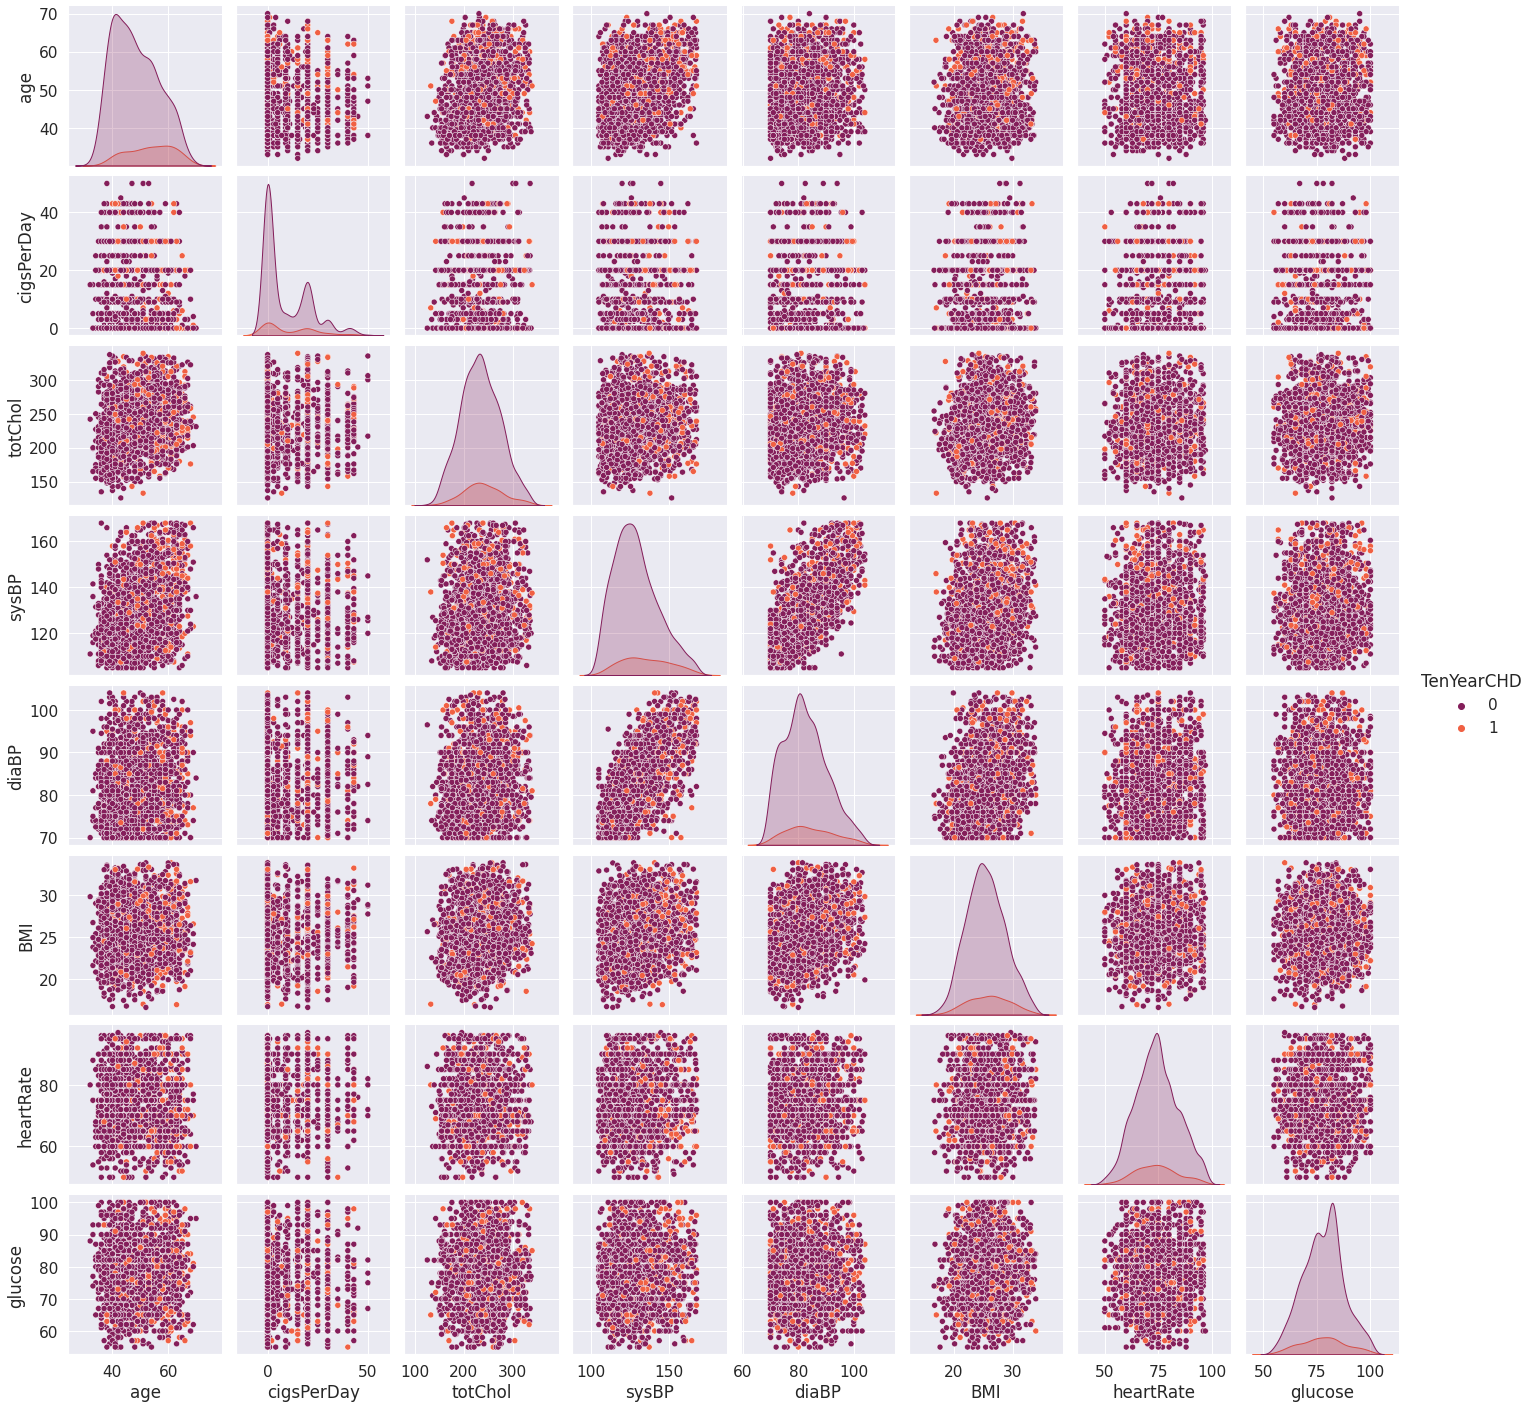

In [28]:
plt.figure(figsize=(20,20))
sns.pairplot(df[cont_col],hue='TenYearCHD',palette='rocket')

# SPLITTING TRAINING AND TESTING DATA

In [29]:
X = df.drop(["TenYearCHD"],axis=1)
y = df["TenYearCHD"]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# LOGISTIC REGRESSION ALGORITHIM

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [34]:
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("Accuracy for training data is",train_accuracy)
print("Accuracy for testing data is",test_accuracy)

Accuracy for training data is 0.8723021582733813
Accuracy for testing data is 0.8588516746411483


[[1454    3]
 [ 210    1]]


[Text(0, 0.5, 'No risk'), Text(0, 1.5, 'Risk')]

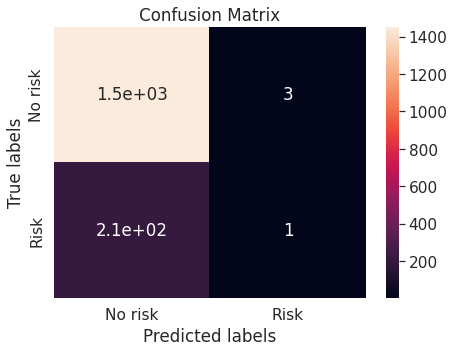

In [35]:
plt.figure(figsize=(7,5))

labels = ['No risk','Risk']

con_matrix = confusion_matrix(y_train, train_preds)
print(con_matrix)

ax= plt.subplot()
sns.heatmap(con_matrix, annot=True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [36]:
from sklearn import metrics
y_pred_proab = model.predict_proba(X_test)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proab[:,1])

auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

AUC: 0.6863002381299509


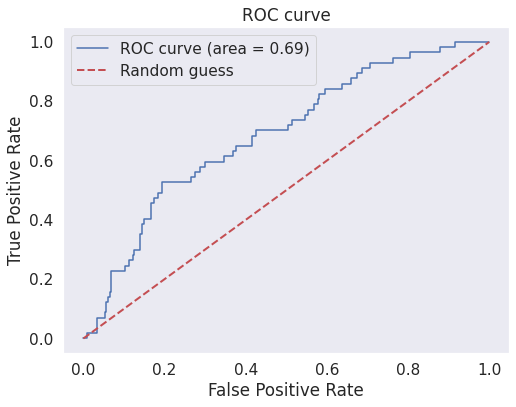

In [37]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import classification_report

print("Training set Report\n\n",classification_report(y_train,train_preds,output_dict=False))
print("\nTesting set Report\n\n",classification_report(y_test,test_preds,output_dict=False))

Training set Report

               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1457
           1       0.25      0.00      0.01       211

    accuracy                           0.87      1668
   macro avg       0.56      0.50      0.47      1668
weighted avg       0.79      0.87      0.82      1668


Testing set Report

               precision    recall  f1-score   support

           0       0.86      0.99      0.92       361
           1       0.00      0.00      0.00        57

    accuracy                           0.86       418
   macro avg       0.43      0.50      0.46       418
weighted avg       0.75      0.86      0.80       418



* When the original imbalanced dataset is used for training the model, the main issues that occured is the recall for the minority class. So we have to remove the imbalancy of this data set by using following technique.
        1. Undersampling
        2. Oversampling
        3. Smote

# Using SMOTE techinque for oversampling

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_over, y_over = sm.fit_resample(X, y)

In [40]:
df_new = pd.concat([X_over,y_over],axis=1)
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4,1,0,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.00000,0
1,46,1,0,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.00000,0
2,50,1,1,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.00000,1
3,64,1,0,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.00000,0
4,55,2,0,0,0.0,0,0,1,0,326.0,144.0,81.0,25.71,85.0,82.08652,0


In [41]:
df_cat_new = df_new.drop(['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose'],axis=1)
df_cont_new = df_new[['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']]
df_cont_new.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,0.0,212.0,168.0,98.0,29.77,72.0,75.00000,0
1,46,10.0,250.0,116.0,71.0,20.35,88.0,94.00000,0
2,50,20.0,233.0,158.0,88.0,28.26,68.0,94.00000,1
3,64,30.0,241.0,136.5,85.0,26.42,70.0,77.00000,0
4,55,0.0,326.0,144.0,81.0,25.71,85.0,82.08652,0


In [42]:
col = ['BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes',]

for i in col:
    a = df_cat_new.groupby(['sex','is_smoking',i,'TenYearCHD']).size()
    print(a)
    print('-------------------------------------------------------------')

sex  is_smoking  BPMeds  TenYearCHD
0    0           0       0             601
                         1             732
                 1       0              16
                         1               6
     1           0       0             370
                         1             347
                 1       0               5
                         1               1
1    0           0       0             318
                         1             229
                 1       0               3
                         1               2
     1           0       0             502
                         1             501
                 1       0               3
dtype: int64
-------------------------------------------------------------
sex  is_smoking  prevalentStroke  TenYearCHD
0    0           0                0             614
                                  1             737
                 1                0               3
                                  1        

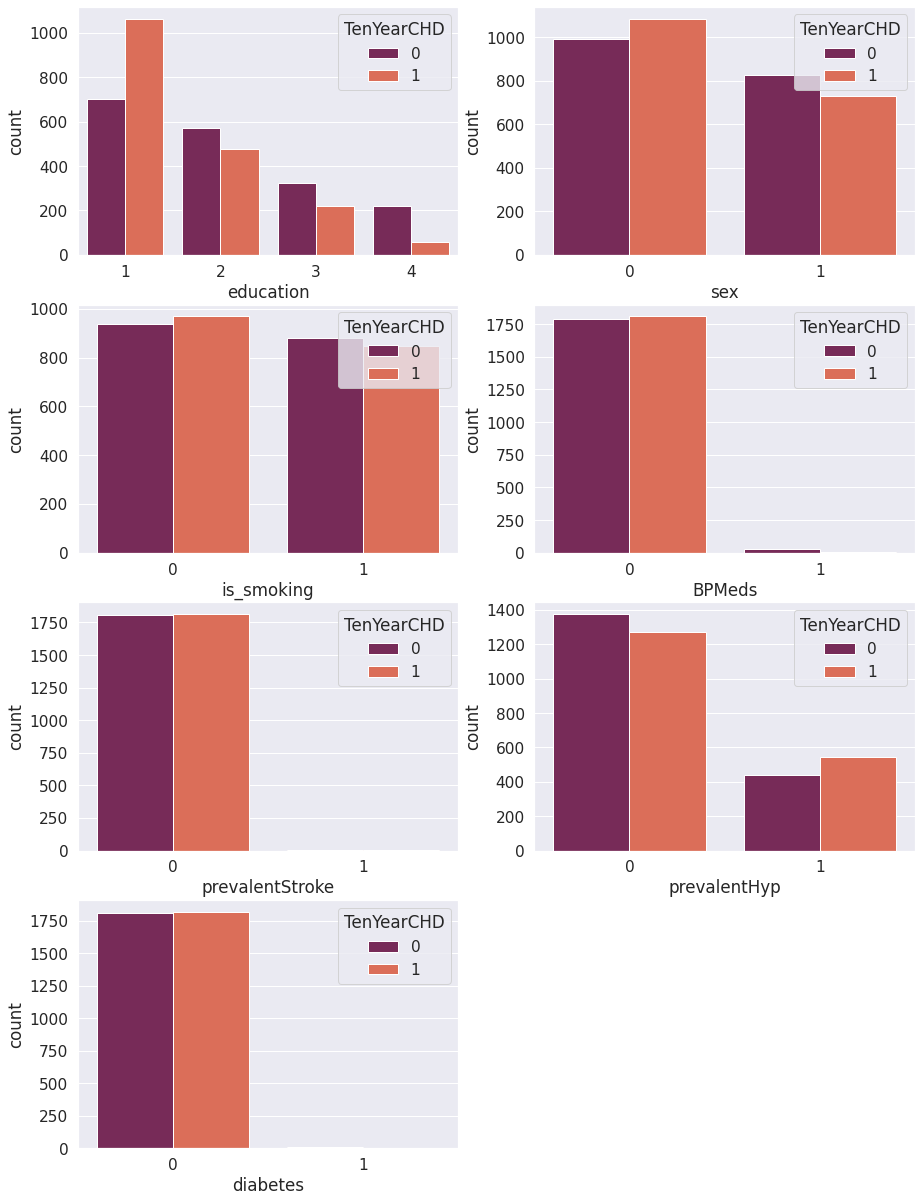

In [43]:
count=1
plt.subplots(figsize=(15, 21))
for i in cat_col[:-1]:
    ax=plt.subplot(4,2,count)
    sns.set(font_scale=1.4)
    sns.countplot(x=df_cat_new[i],hue=df_cat_new["TenYearCHD"],palette='rocket')
    count+=1
plt.show()

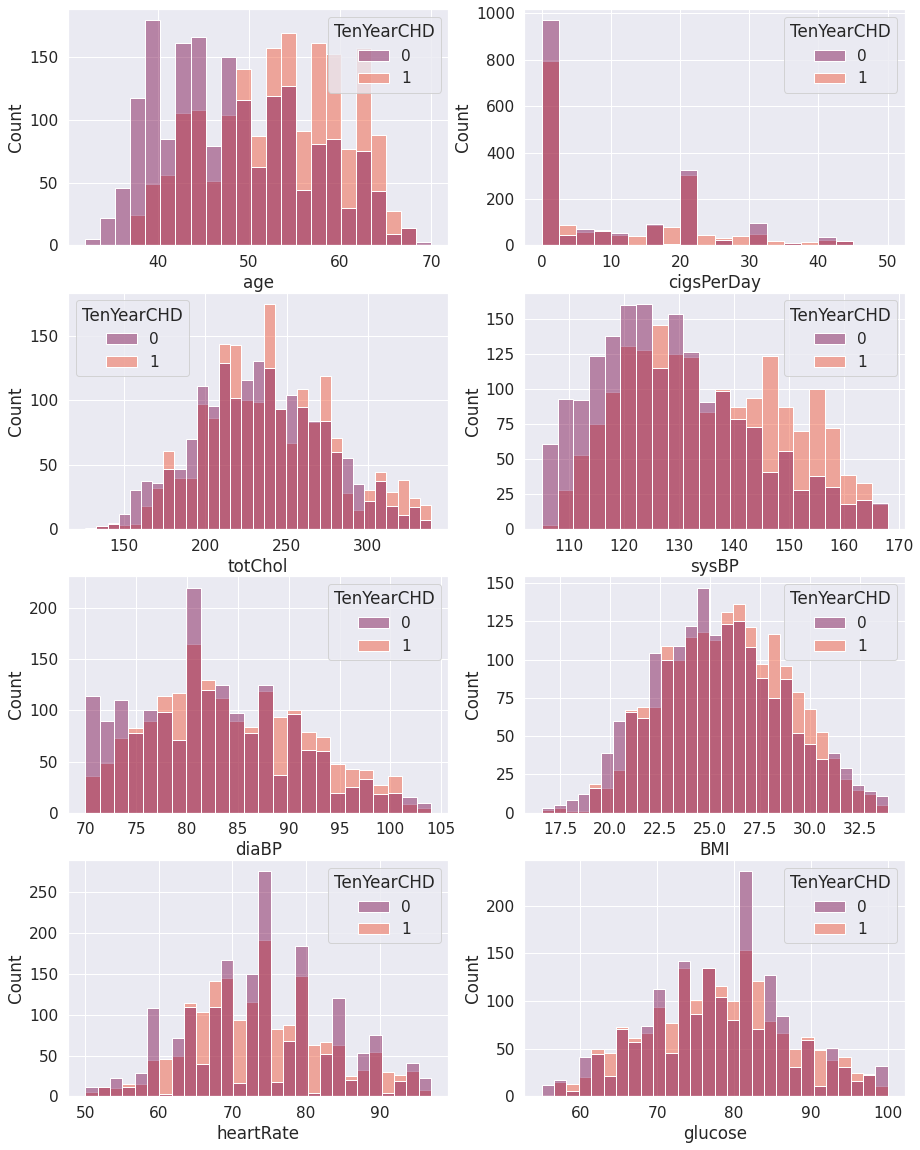

In [44]:
count=1
plt.subplots(figsize=(15, 20))

for i in cont_col[:-1]:
    ax=plt.subplot(4,2,count)
    sns.set(font_scale=1.4)
    sns.histplot(x=i, hue='TenYearCHD',data=df_cont_new,palette='rocket')
    count+=1
plt.show()

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size = 0.2, random_state = 0)

In [46]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [47]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [49]:
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("Accuracy for training data is",train_accuracy)
print("Accuracy for testing data is",test_accuracy)

Accuracy for training data is 0.6915405777166438
Accuracy for testing data is 0.6923076923076923


[[ 978  475]
 [ 422 1033]]


[Text(0, 0.5, 'No risk'), Text(0, 1.5, 'Risk')]

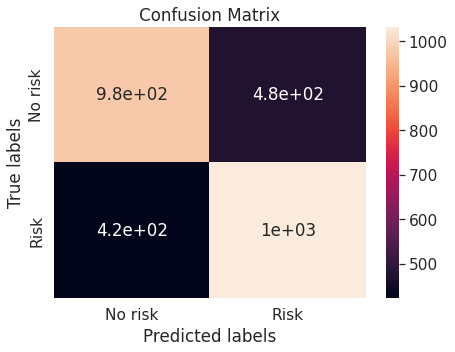

In [50]:
plt.figure(figsize=(7,5))

labels = ['No risk','Risk']

con_matrix = confusion_matrix(y_train, train_preds)
print(con_matrix)

ax= plt.subplot()
sns.heatmap(con_matrix, annot=True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [51]:
from sklearn import metrics
y_pred_proab = model.predict_proba(X_test)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proab[:,1])

auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

AUC: 0.753922789539228


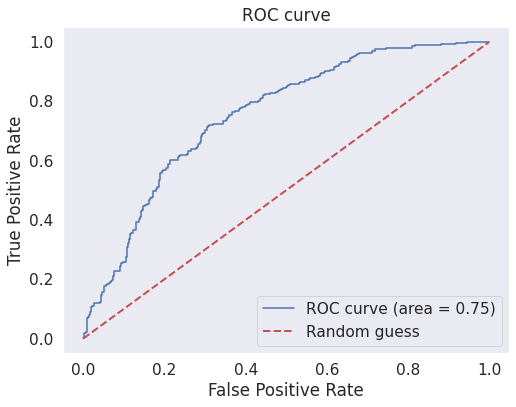

In [52]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import classification_report

print("Training set Report\n\n",classification_report(y_train,train_preds,output_dict=False))
print("\nTesting set Report\n\n",classification_report(y_test,test_preds,output_dict=False))

Training set Report

               precision    recall  f1-score   support

           0       0.70      0.67      0.69      1453
           1       0.69      0.71      0.70      1455

    accuracy                           0.69      2908
   macro avg       0.69      0.69      0.69      2908
weighted avg       0.69      0.69      0.69      2908


Testing set Report

               precision    recall  f1-score   support

           0       0.71      0.65      0.68       365
           1       0.68      0.74      0.71       363

    accuracy                           0.69       728
   macro avg       0.69      0.69      0.69       728
weighted avg       0.69      0.69      0.69       728



# Using Near Miss technique for undersampling

In [54]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)
X_under, y_under = undersample.fit_resample(X, y)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_under,y_under,test_size=0.2,random_state=0)

In [56]:
df_new = pd.concat([X_under,y_under],axis=1)
df_cat_new = df_new.drop(['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose'],axis=1)
df_cont_new = df_new[['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']]
col = ['BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes',]

for i in col:
    a = df_cat_new.groupby(['sex','is_smoking',i,'TenYearCHD']).size()
    print(a)
    print('-------------------------------------------------------------')


sex  is_smoking  BPMeds  TenYearCHD
0    0           0       0             114
                         1              62
                 1       0               1
                         1               6
     1           0       0              44
                         1              44
                 1       1               1
1    0           0       0              58
                         1              52
                 1       0               1
                         1               2
     1           0       0              50
                         1             101
dtype: int64
-------------------------------------------------------------
sex  is_smoking  prevalentStroke  TenYearCHD
0    0           0                0             115
                                  1              67
                 1                1               1
     1           0                0              44
                                  1              45
1    0           0       

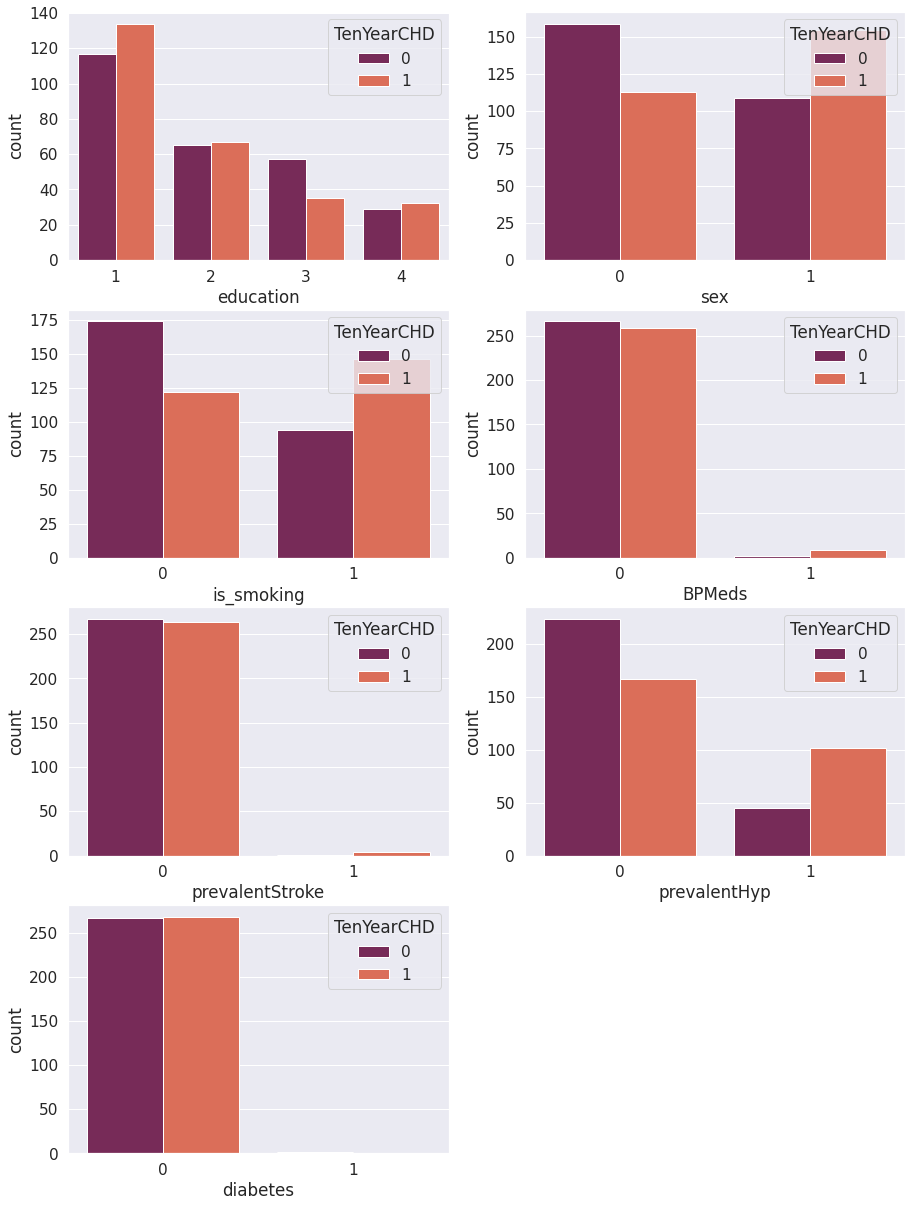

In [57]:
count=1
plt.subplots(figsize=(15, 21))
for i in cat_col[:-1]:
    ax=plt.subplot(4,2,count)
    sns.set(font_scale=1.4)
    sns.countplot(x=df_cat_new[i],hue=df_cat_new["TenYearCHD"],palette='rocket')
    count+=1
plt.show()

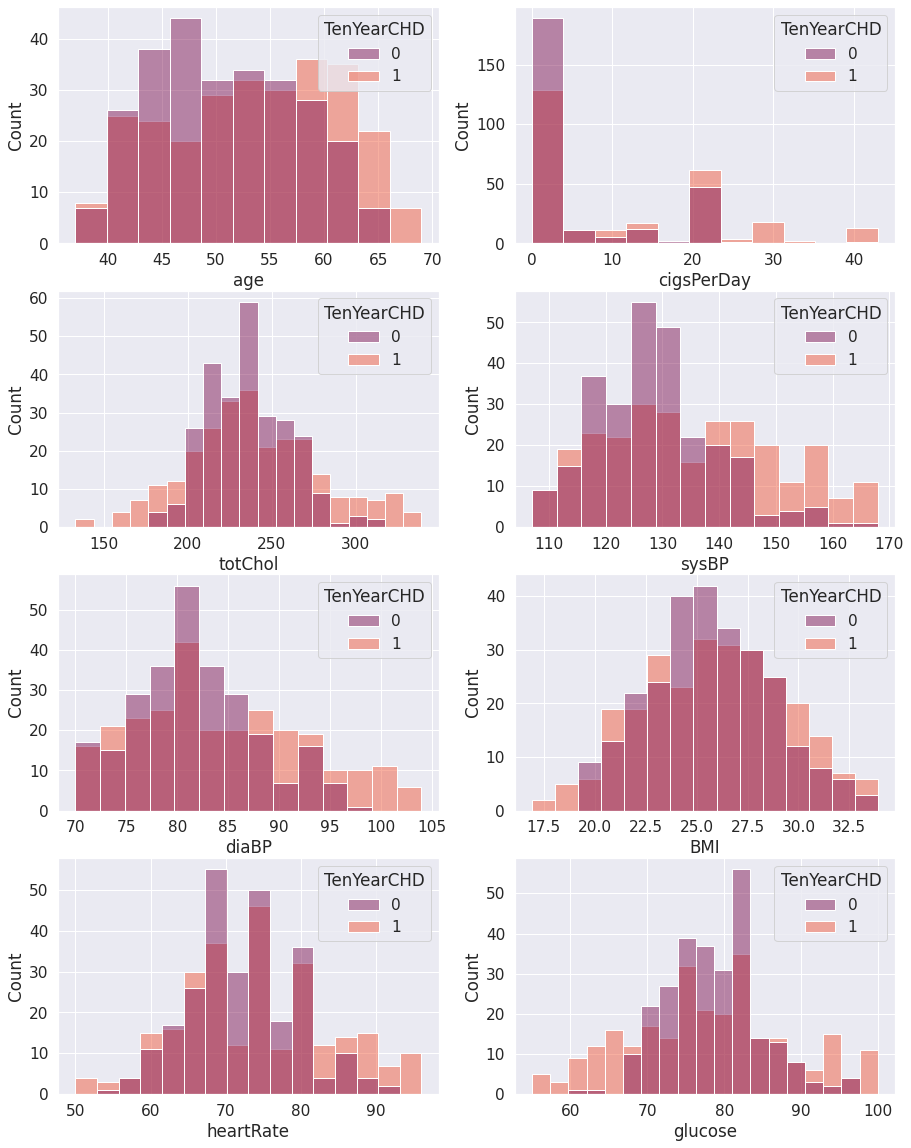

In [58]:
count=1
plt.subplots(figsize=(15, 20))

for i in cont_col[:-1]:
    ax=plt.subplot(4,2,count)
    sns.set(font_scale=1.4)
    sns.histplot(x=i, hue='TenYearCHD',data=df_cont_new,palette='rocket')
    count+=1
plt.show()

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [61]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [62]:
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("Accuracy for training data is",train_accuracy)
print("Accuracy for testing data is",test_accuracy)

Accuracy for training data is 0.7149532710280374
Accuracy for testing data is 0.7037037037037037


[[162  54]
 [ 68 144]]


[Text(0, 0.5, 'No risk'), Text(0, 1.5, 'Risk')]

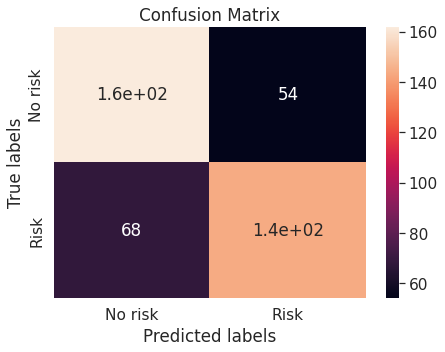

In [63]:
plt.figure(figsize=(7,5))

labels = ['No risk','Risk']

con_matrix = confusion_matrix(y_train, train_preds)
print(con_matrix)

ax= plt.subplot()
sns.heatmap(con_matrix, annot=True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [64]:
from sklearn import metrics
y_pred_proab = model.predict_proba(X_test)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proab[:,1])

auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

AUC: 0.7465659340659341


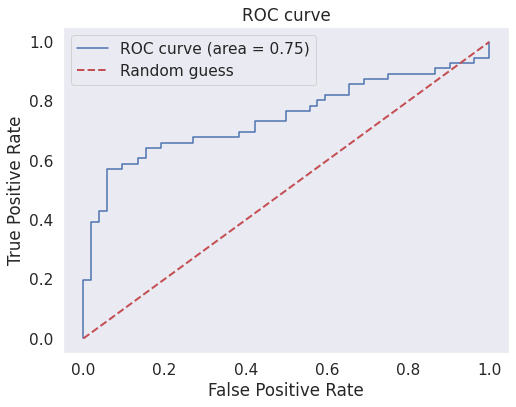

In [65]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import classification_report

print("Training set Report\n\n",classification_report(y_train,train_preds,output_dict=False))
print("\nTesting set Report\n\n",classification_report(y_test,test_preds,output_dict=False))

Training set Report

               precision    recall  f1-score   support

           0       0.70      0.75      0.73       216
           1       0.73      0.68      0.70       212

    accuracy                           0.71       428
   macro avg       0.72      0.71      0.71       428
weighted avg       0.72      0.71      0.71       428


Testing set Report

               precision    recall  f1-score   support

           0       0.68      0.73      0.70        52
           1       0.73      0.68      0.70        56

    accuracy                           0.70       108
   macro avg       0.70      0.70      0.70       108
weighted avg       0.71      0.70      0.70       108



* After doing undersampling and oversampling we can see that for undersampling Accuracy is more with better recall. 

# Implementing cross validation on under sample model

In [67]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [68]:
model = LogisticRegression()

In [69]:
acc_score = ['accuracy']
scores = cross_validate(model,X_train, y_train, scoring = acc_score, 
                        cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.716, test=0.640) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.699, test=0.651) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.719, test=0.733) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.711, test=0.729) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.726, test=0.694) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [70]:
scores["train_accuracy"]

array([0.71637427, 0.69883041, 0.71929825, 0.71137026, 0.72594752])

In [71]:
scores['test_accuracy']

array([0.63953488, 0.65116279, 0.73255814, 0.72941176, 0.69411765])

In [72]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [73]:
for model in scores['estimator']:
    print(model.coef_)

[[ 1.22480386 -0.09382349  0.73122677  0.40255738  1.32564837  0.68249619
   0.21018262  0.27417395 -0.47589041  0.12018859  1.65228428  0.15324184
  -0.46221386  0.91064458 -0.1947388 ]]
[[ 1.24143125  0.03954341  0.68823963  0.32439046  1.57219333  0.70058062
   0.17064857  0.66885124  0.          0.2803595   1.41744492  0.03367787
  -0.49295061  0.55657882  0.10200243]]
[[ 1.31045006 -0.39943043  0.55851597  0.19580368  1.60584299  0.64882836
   0.62721763  0.47327101 -0.44338169  0.30831599  1.37969821  0.0778813
  -0.44777038  1.05381354 -0.07091233]]
[[ 1.52917476 -0.14296068  0.43376358  0.11100439  1.7732589   0.6059698
  -0.25694283  0.27933912 -0.43133882  0.13672183  1.30118478  0.28356164
  -0.35395525  0.96866339 -0.14503977]]
[[ 1.61111205 -0.02708058  0.62965801  0.40594251  1.2339197   0.51202973
   0.12379332  0.40312997 -0.45723426  0.2570629   1.31080496  0.14521411
  -0.26032799  1.1502841  -0.06863596]]


# DECISION TREE ALGORITHIM

In [74]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16, random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16, random_state=0)

In [75]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [76]:
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("Accuracy for training data is",train_accuracy)
print("Accuracy for testing data is",test_accuracy)

Accuracy for training data is 0.8177570093457944
Accuracy for testing data is 0.6574074074074074


[[192  24]
 [ 54 158]]


[Text(0, 0.5, 'No risk'), Text(0, 1.5, 'Risk')]

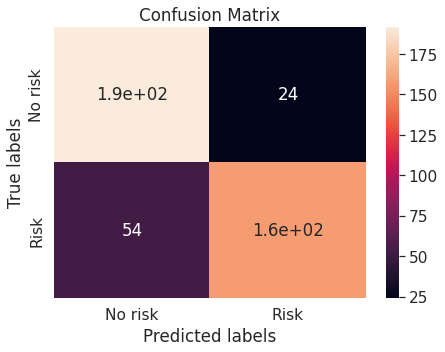

In [77]:
plt.figure(figsize=(7,5))

labels = ['No risk','Risk']

con_matrix = confusion_matrix(y_train, train_preds)
print(con_matrix)

ax= plt.subplot()
sns.heatmap(con_matrix, annot=True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [78]:
y_pred_proab = model.predict_proba(X_test)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proab[:,1])

auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

AUC: 0.7115384615384616


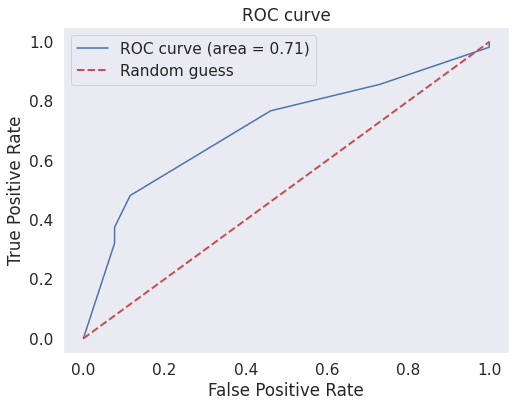

In [79]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [80]:
print("Training set Report\n\n",classification_report(y_train,train_preds,output_dict=False))
print("\nTesting set Report\n\n",classification_report(y_test,test_preds,output_dict=False))

Training set Report

               precision    recall  f1-score   support

           0       0.78      0.89      0.83       216
           1       0.87      0.75      0.80       212

    accuracy                           0.82       428
   macro avg       0.82      0.82      0.82       428
weighted avg       0.82      0.82      0.82       428


Testing set Report

               precision    recall  f1-score   support

           0       0.68      0.54      0.60        52
           1       0.64      0.77      0.70        56

    accuracy                           0.66       108
   macro avg       0.66      0.65      0.65       108
weighted avg       0.66      0.66      0.65       108



# RANDOM FOREST CLASSIFIER

In [81]:
model = ensemble.RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [83]:
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("Accuracy for training data is",train_accuracy)
print("Accuracy for testing data is",test_accuracy)

Accuracy for training data is 1.0
Accuracy for testing data is 0.7407407407407407


[[216   0]
 [  0 212]]


[Text(0, 0.5, 'No risk'), Text(0, 1.5, 'Risk')]

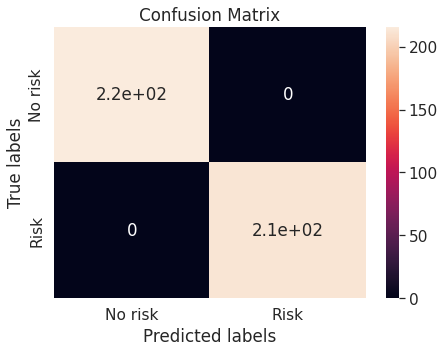

In [84]:
plt.figure(figsize=(7,5))

labels = ['No risk','Risk']

con_matrix = confusion_matrix(y_train, train_preds)
print(con_matrix)

ax= plt.subplot()
sns.heatmap(con_matrix, annot=True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [85]:
y_pred_proab = model.predict_proba(X_test)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proab[:,1])

auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

AUC: 0.8166208791208791


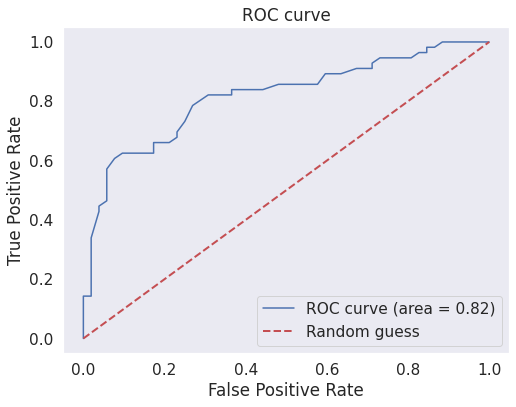

In [86]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [87]:
print("Training set Report\n\n",classification_report(y_train,train_preds,output_dict=False))
print("\nTesting set Report\n\n",classification_report(y_test,test_preds,output_dict=False))

Training set Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       212

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428


Testing set Report

               precision    recall  f1-score   support

           0       0.77      0.65      0.71        52
           1       0.72      0.82      0.77        56

    accuracy                           0.74       108
   macro avg       0.75      0.74      0.74       108
weighted avg       0.74      0.74      0.74       108

